In [1]:
from keras import Model, Input
from keras import models
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# **Load data**

In [2]:
data = pd.read_csv("IMDB Dataset.csv", names=['review', 'сlass'], header=0,encoding='utf-8')
data.shape

(50000, 2)

In [3]:
x_train = data['review']
y_train = data['сlass']
del data

In [4]:
print(x_train[0])
print(y_train[0])
print(len(x_train))


One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

# **Prepare X data**

In [5]:
max_words = 20_000

In [6]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
del tokenizer

In [7]:
def vectorize(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] += 1
    return results/np.amax(results)

In [8]:
x_train = vectorize(x_train, max_words)

# **Prepare Y data**

In [9]:
y_train = [1 if i == 'positive' else 0 for i in y_train]

# **Split data**

In [10]:
x_test = x_train[:10_000]
y_test = y_train[:10_000]

x_train = x_train[10_000:]
y_train = y_train[10_000:]

In [11]:
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = np.array(x_train)
y_train = np.array(y_train)

# **Model 1**

In [12]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization
from tensorflow.keras import regularizers

In [13]:
model = Sequential()

model.add(Dense(100, activation='sigmoid', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(75, activation='sigmoid'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(1))

In [14]:
model.compile(loss ='binary_crossentropy', optimizer='rmsprop' ,metrics =['accuracy'])

# **Train model**

In [39]:
epochs = 10

history = model.fit(x_train, y_train, batch_size = 512, epochs = epochs, verbose = 1)

Epoch 1/10
79/79 [==============================] - 384s 5s/step - loss: 0.6932 - acc: 0.5007
Epoch 2/10
79/79 [==============================] - 402s 5s/step - loss: 0.6932 - acc: 0.4981
Epoch 3/10
79/79 [==============================] - 409s 5s/step - loss: 0.6932 - acc: 0.5007
Epoch 4/10
79/79 [==============================] - 411s 5s/step - loss: 0.6932 - acc: 0.4995
Epoch 5/10
79/79 [==============================] - 415s 5s/step - loss: 0.6932 - acc: 0.4946
Epoch 6/10
79/79 [==============================] - 420s 5s/step - loss: 0.6932 - acc: 0.4994
Epoch 7/10
79/79 [==============================] - 416s 5s/step - loss: 0.6932 - acc: 0.4988
Epoch 8/10
79/79 [==============================] - 417s 5s/step - loss: 0.6932 - acc: 0.5001
Epoch 9/10
79/79 [==============================] - 418s 5s/step - loss: 0.6932 - acc: 0.4996
Epoch 10/10
79/79 [==============================] - 418s 5s/step - loss: 0.6932 - acc: 0.5007


Text(0.5, 1.0, 'Loss evolution')

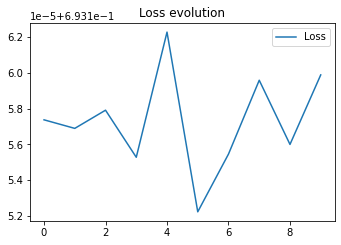

In [42]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.legend()
plt.title('Loss evolution')

# **Test model**

In [17]:
scores = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 2.6877 - accuracy: 0.7466


In [18]:
from keras.preprocessing.sequence import pad_sequences
X_train = pad_sequences(x_train, maxlen = max_words)
X_test = pad_sequences(x_test, maxlen = max_words)

# **Model 2**

In [26]:

# Building the Model
max_features = 10000 
model = models.Sequential()
model.add(layers.Embedding(max_features, 32, input_length = max_words))
model.add(layers.Conv1D(32, 5, activation = 'relu'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [27]:
model.compile(loss ='binary_crossentropy', optimizer='rmsprop' ,metrics =['accuracy'])


In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20000, 32)         320000    
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 19996, 32)         5152      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 6665, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6665, 32)          0         
_________________________________________________________________
dense_5 (Dense)              (None, 6665, 1)           33        
Total params: 325,185
Trainable params: 325,185
Non-trainable params: 0
_________________________________________________________________


# **Train model**

In [31]:
history = model.fit(X_train, y_train, batch_size = 512, epochs = 10, validation_split = 0.2)

Epoch 1/10
63/63 [==============================] - 324s 5s/step - loss: 0.6932 - acc: 0.5003 - val_loss: 0.6932 - val_acc: 0.4967
Epoch 2/10
63/63 [==============================] - 322s 5s/step - loss: 0.6932 - acc: 0.5010 - val_loss: 0.6932 - val_acc: 0.4967
Epoch 3/10
63/63 [==============================] - 319s 5s/step - loss: 0.6932 - acc: 0.5017 - val_loss: 0.6932 - val_acc: 0.4967
Epoch 4/10
63/63 [==============================] - 321s 5s/step - loss: 0.6931 - acc: 0.5017 - val_loss: 0.6932 - val_acc: 0.4967
Epoch 5/10
63/63 [==============================] - 321s 5s/step - loss: 0.6931 - acc: 0.5029 - val_loss: 0.6931 - val_acc: 0.5033
Epoch 6/10
63/63 [==============================] - 324s 5s/step - loss: 0.6932 - acc: 0.5017 - val_loss: 0.6932 - val_acc: 0.4967
Epoch 7/10
63/63 [==============================] - 326s 5s/step - loss: 0.6932 - acc: 0.5017 - val_loss: 0.6932 - val_acc: 0.4967
Epoch 8/10
63/63 [==============================] - 327s 5s/step - loss: 0.6931 - a


# Plotting Training and Validation Loss



Text(0.5, 1.0, 'Loss evolution')

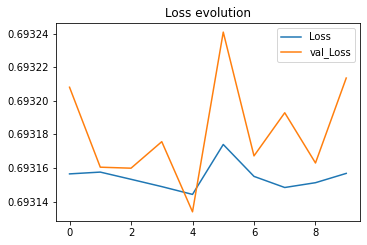

In [37]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')